**Reema Yadav** <br>
*Reduce maintenance cost through predictive techniques* <br>
*Background* <br>
<blockquote>Company (3D Technologies) has a fleet of devices transmitting daily aggregated telemetry attributes. 
Predictive maintenance techniques are designed to help determine the condition of in-service equipment in order to predict when maintenance
should be performed. This approach promises cost savings over routine or time-based preventive maintenance, because tasks are performed only
when warranted. </blockquote> <br>
Goal <br>
<blockquote>You are tasked with building a predictive model using machine learning to predict the probability of a device failure. When building this 
model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 
for non-failure and 1 for failure.</blockquote>


Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas_profiling
import pandas as pd
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import geometric_mean_score as geo
from imblearn.metrics import make_index_balanced_accuracy as iba
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
%matplotlib inline
pd.DataFrame()
scaler = StandardScaler()
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
df = pd.read_csv('C:/Users/18572/Documents/Netapp/device_failure.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0  2015-01-01  S1F01085        0   215630672          56           0   
1  2015-01-01  S1F0166B        0    61370680           0           3   
2  2015-01-01  S1F01E6Y        0   173295968           0           0   
3  2015-01-01  S1F01JE0        0    79694024           0           0   
4  2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0          52           6      407438           0           0           7  
1           0           6      403174           0           0           0  
2           0          12      237394           0           0           0  
3           0           6      410186           0           0           0  
4           0          15      313173           0           0           3

In [4]:
df.describe()

failure    attribute1     attribute2     attribute3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.484762       9.940455   
std         0.029167  7.045933e+07    2179.657730     185.747321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

          attribute4     attribute5     attribute6     attribute7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  221452.000000       0.000000   
50%         0.000000      10.000000  249799.500000       0.000000   
75%         0.000000      12.000000  310266.000000       0.000000   
max      1666.000000      98.000000  689161.000000     832.000000   

          attribute8     attribute9  
count  124494.000000  124494.000000  
mean        0.292528      12.451524  
std         7.436924     191.425623  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       832.000000   18701.000000

In [5]:
# Looking at time range of data
max(df.date), min(df.date)

('2015-11-02', '2015-01-01')

In [6]:
# To get report of data for understanding it better
pandas_profiling.ProfileReport(df)

In [6]:
# Dataset Failureres with failure=1
Failureres= df[df['failure'] ==1]
Failureres

date    device  failure  attribute1  attribute2  attribute3  \
4885    2015-01-05  S1F0RRB1        1    48467332       64776           0   
6879    2015-01-07  S1F0CTDN        1   184069720         528           0   
8823    2015-01-09  W1F0PNA5        1   136429411       64784           0   
11957   2015-01-13  W1F13SRV        1   188251248        2040           0   
12668   2015-01-14  W1F1230J        1   220461296           0           0   
...            ...       ...      ...         ...         ...         ...   
109927  2015-08-04  W1F1CB5E        1    16043296          88           0   
114251  2015-08-18  Z1F0MRPJ        1    65654088           0           0   
122118  2015-10-05  S1F0JGJV        1    13739704           0           0   
122808  2015-10-09  Z1F14BGY        1    85259320           0           0   
124329  2015-10-26  W1F0T0B1        1    95073232           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
4885           841           8       39267          56          56           1  
6879             4           9      387871          32          32           3  
8823           406          30      224801           8           8           0  
11957            0           6       39345          32          32           1  
12668            0          14      325125           0           0           0  
...            ...         ...         ...         ...         ...         ...  
109927           0           9          30           0           0           0  
114251           0           9      298592           0           0          11  
122118          18           8      343760           0           0           0  
122808         164           8      262932           0           0           0  
124329           7           9      354861          22          22           0  

[106 rows x 12 columns]

In [7]:
(df['failure']==1).sum()

106

In [9]:
Failureres.device.nunique()

106

In [10]:
df.isna().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [11]:
df.nunique()

date             304
device          1169
failure            2
attribute1    123877
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [12]:
# Adding features
df.date = pd.to_datetime(df.date)
df['activedays']=df.date-df.date[0]
df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0 2015-01-01  S1F01085        0   215630672          56           0   
1 2015-01-01  S1F0166B        0    61370680           0           3   
2 2015-01-01  S1F01E6Y        0   173295968           0           0   
3 2015-01-01  S1F01JE0        0    79694024           0           0   
4 2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  \
0          52           6      407438           0           0           7   
1           0           6      403174           0           0           0   
2           0          12      237394           0           0           0   
3           0           6      410186           0           0           0   
4           0          15      313173           0           0           3   

  activedays  month  week_day  
0     0 days      1         3  
1     0 days      1         3  
2     0 days      1         3  
3     0 days      1         3  
4     0 days      1         3

In [13]:
# Dataset Failureres with failure=1
Failureres= df[df['failure'] ==1]
Failureres

date    device  failure  attribute1  attribute2  attribute3  \
4885   2015-01-05  S1F0RRB1        1    48467332       64776           0   
6879   2015-01-07  S1F0CTDN        1   184069720         528           0   
8823   2015-01-09  W1F0PNA5        1   136429411       64784           0   
11957  2015-01-13  W1F13SRV        1   188251248        2040           0   
12668  2015-01-14  W1F1230J        1   220461296           0           0   
...           ...       ...      ...         ...         ...         ...   
109927 2015-08-04  W1F1CB5E        1    16043296          88           0   
114251 2015-08-18  Z1F0MRPJ        1    65654088           0           0   
122118 2015-10-05  S1F0JGJV        1    13739704           0           0   
122808 2015-10-09  Z1F14BGY        1    85259320           0           0   
124329 2015-10-26  W1F0T0B1        1    95073232           0           0   

        attribute4  attribute5  attribute6  attribute7  attribute8  \
4885           841           8       39267          56          56   
6879             4           9      387871          32          32   
8823           406          30      224801           8           8   
11957            0           6       39345          32          32   
12668            0          14      325125           0           0   
...            ...         ...         ...         ...         ...   
109927           0           9          30           0           0   
114251           0           9      298592           0           0   
122118          18           8      343760           0           0   
122808         164           8      262932           0           0   
124329           7           9      354861          22          22   

        attribute9 activedays  month  week_day  
4885             1     4 days      1         7  
6879             3     6 days      1         2  
8823             0     8 days      1         4  
11957            1    12 days      1         1  
12668            0    13 days      1         2  
...            ...        ...    ...       ...  
109927           0   215 days      8         1  
114251          11   229 days      8         1  
122118           0   277 days     10         7  
122808           0   281 days     10         4  
124329           0   298 days     10         7  

[106 rows x 15 columns]

<AxesSubplot:xlabel='month'>

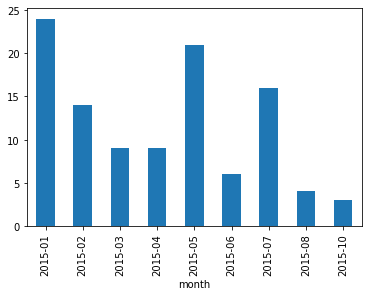

In [14]:
# Plot to see of we can observe any trend on failure=1 month wise
Failureres['month'] = pd.to_datetime(Failureres['date']).dt.to_period('M')
months = Failureres['month'].sort_values()
Failureres.groupby('month')['failure'].count().plot.bar()

<AxesSubplot:xlabel='month'>

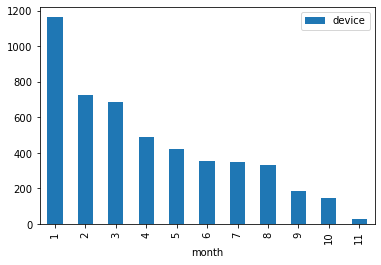

In [15]:
# Plot to see unique devices month wise
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot.bar()

<AxesSubplot:xlabel='activedays'>

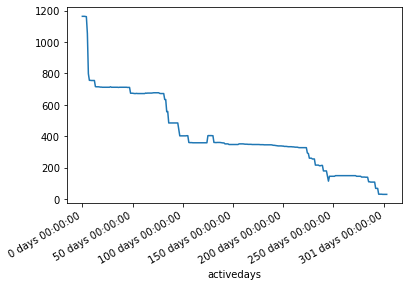

In [16]:
# Plot to observe the devices for activedays
df.groupby('activedays')['device'].count().plot()

In [17]:
df.groupby('device').agg(pd.Series.tolist)

date  \
device                                                        
S1F01085  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
S1F013BB  [2015-05-06 00:00:00, 2015-05-07 00:00:00, 201...   
S1F0166B  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
S1F01E6Y  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
S1F01JE0  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
...                                                     ...   
Z1F1VMZB  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
Z1F1VQFY  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
Z1F26YZB  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
Z1F282ZV  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   
Z1F2PBHX  [2015-01-01 00:00:00, 2015-01-02 00:00:00, 201...   

                                                    failure  \
device                                                        
S1F01085                                 [0, 0, 0, 0, 0, 0]   
S1F013BB                                 [0, 0, 0, 0, 0, 0]   
S1F0166B                                 [0, 0, 0, 0, 0, 0]   
S1F01E6Y  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
S1F01JE0                                 [0, 0, 0, 0, 0, 0]   
...                                                     ...   
Z1F1VMZB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F1VQFY  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F26YZB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F282ZV  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F2PBHX  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 attribute1  \
device                                                        
S1F01085  [215630672, 1650864, 124017368, 128073224, 973...   
S1F013BB  [14533968, 46202296, 214383720, 243346080, 851...   
S1F0166B  [61370680, 191946112, 77681360, 82195688, 2243...   
S1F01E6Y  [173295968, 192723440, 214317232, 236917296, 1...   
S1F01JE0  [79694024, 109398680, 235562856, 235473648, 15...   
...                                                     ...   
Z1F1VMZB  [45340272, 70062704, 103791096, 129214672, 158...   
Z1F1VQFY  [16736808, 41152944, 63646656, 84723032, 10496...   
Z1F26YZB  [193902776, 214635632, 234190248, 7821848, 321...   
Z1F282ZV  [161799176, 180654304, 200890168, 223270200, 2...   
Z1F2PBHX  [129475464, 148229136, 188059992, 167365376, 2...   

                                                 attribute2  \
device                                                        
S1F01085                           [56, 56, 56, 56, 56, 56]   
S1F013BB                                 [0, 0, 0, 0, 0, 0]   
S1F0166B                                 [0, 0, 0, 0, 0, 0]   
S1F01E6Y  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
S1F01JE0                                 [0, 0, 0, 0, 0, 0]   
...                                                     ...   
Z1F1VMZB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F1VQFY  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F26YZB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F282ZV  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F2PBHX  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                 attribute3  \
device                                                        
S1F01085                                 [0, 0, 0, 0, 0, 0]   
S1F013BB                                 [0, 0, 0, 0, 0, 0]   
S1F0166B                                 [3, 3, 3, 3, 3, 3]   
S1F01E6Y  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
S1F01JE0                                 [0, 0, 0, 0, 0, 0]   
...                                                     ...   
Z1F1VMZB  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F1VQFY  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
Z1F26YZB  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
Z1F282ZV  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
Z1F2PBHX  [0, 0, 0,

In [19]:
# So getting 1 cannot be considered as last value for that particular device, because there were devices which started working sometime after failing 
# Max date is the last day the device got checked. Device returned to use after failed because got fixed if max date is ahead of failure date
df_date = df.groupby('device').agg({'date':max}) # getting the max date for each device
df_date.date.to_dict() # changing it to dictionary
df_failure = df.loc[df.failure==1,['device','date']] # making a df_failure dataset for failed devices
df_good = df.loc[df.failure==0,['device','date']] # making df_good dataset for devices that never failed
df_date.shape,df_failure.shape # ((1169, 1), (106, 2))
df['max_date']=df.device.map(df_date.date.to_dict()) # creating a dataframe with max_date
df.head()
dff=df[(df.failure==1)&(df.date!=df.max_date)] #creating a dataframe dff where failure=1 and date in dataframe df is not equal to max_date in df 
dff
# so the resulted dff dataframe would have data of devices that became active even after failing

date    device  failure  attribute1  attribute2  attribute3  \
77958  2015-05-05  S1F136J0        1   131519808           0           0   
79590  2015-05-09  W1F0KCP2        1   176861128       10392           0   
79601  2015-05-09  W1F0M35B        1   141805096           0           0   
101999 2015-07-12  S1F0GPFZ        1   236544080           0           0   
104223 2015-07-18  W1F11ZG9        1    32671632         368           9   

        attribute4  attribute5  attribute6  attribute7  attribute8  \
77958           25          16      343464           8           8   
79590          121           6      310699           0           0   
79601            1           7      267203           0           0   
101999           0           9      264594           0           0   
104223         486           3      344433           0           0   

        attribute9 activedays  month  week_day   max_date  
77958            0   124 days      5         1 2015-05-06  
79590            0   128 days      5         5 2015-05-11  
79601            0   128 days      5         5 2015-05-11  
101999           0   192 days      7         6 2015-07-24  
104223           1   198 days      7         5 2015-08-17

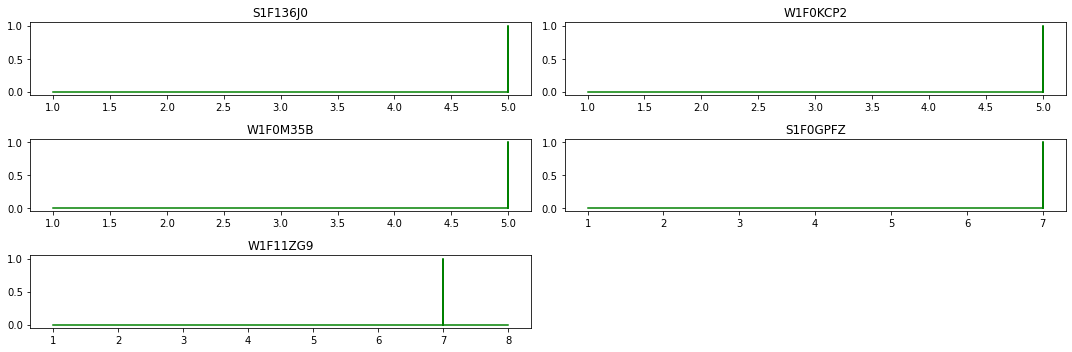

In [20]:
# Plots to see the above devices which started working after failure
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(3, 2, 1)
ax1.set_title("S1F136J0")
plt.plot(df.loc[df['device']=='S1F136J0',['failure','month']]['month'],df.loc[df['device']=='S1F136J0',['failure','month']]['failure'],color = 'green')
ax2=fig.add_subplot(3, 2, 2) 
ax2.set_title("W1F0KCP2")
plt.plot(df.loc[df['device']=='W1F0KCP2',['failure','month']]['month'],df.loc[df['device']=='W1F0KCP2',['failure','month']]['failure'],color = 'green')
ax3=fig.add_subplot(3, 2, 3)
ax3.set_title("W1F0M35B")
plt.plot(df.loc[df['device']=='W1F0M35B',['failure','month']]['month'],df.loc[df['device']=='W1F0M35B',['failure','month']]['failure'],color = 'green')
ax4=fig.add_subplot(3, 2, 4)
ax4.set_title("S1F0GPFZ")
plt.plot(df.loc[df['device']=='S1F0GPFZ',['failure','month']]['month'],df.loc[df['device']=='S1F0GPFZ',['failure','month']]['failure'],color = 'green')
ax5=fig.add_subplot(3, 2, 5)
ax5.set_title("W1F11ZG9")
plt.plot(df.loc[df['device']=='W1F11ZG9',['failure','month']]['month'],df.loc[df['device']=='W1F11ZG9',['failure','month']]['failure'],color = 'green')
plt.tight_layout()

In [21]:
# Observing one of the above device
df[df.device == 'W1F0M35B']

date    device  failure  attribute1  attribute2  attribute3  \
620   2015-01-01  W1F0M35B        0     1765736           0           0   
1783  2015-01-02  W1F0M35B        0    21500120           0           0   
2946  2015-01-03  W1F0M35B        0    42143520           0           0   
4109  2015-01-04  W1F0M35B        0    67353816           0           0   
5270  2015-01-05  W1F0M35B        0    87763488           0           0   
...          ...       ...      ...         ...         ...         ...   
78790 2015-05-07  W1F0M35B        0     4780056           0           0   
79195 2015-05-08  W1F0M35B        0   175645672           0           0   
79601 2015-05-09  W1F0M35B        1   141805096           0           0   
80006 2015-05-10  W1F0M35B        0   158339032          96           0   
80410 2015-05-11  W1F0M35B        0   181444320         456           0   

       attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  \
620             0           7      242030           0           0           0   
1783            0           7      243193           0           0           0   
2946            0           7      244358           0           0           0   
4109            0           7      245507           0           0           0   
5270            0           7      246644           0           0           0   
...           ...         ...         ...         ...         ...         ...   
78790           1           7      267203           0           0           0   
79195           1           7      267203           0           0           0   
79601           1           7      267203           0           0           0   
80006           1           7      267287           8           8           0   
80410           1           7      267488           8           8           0   

      activedays  month  week_day   max_date  
620       0 days      1         3 2015-05-11  
1783      1 days      1         4 2015-05-11  
2946      2 days      1         5 2015-05-11  
4109      3 days      1         6 2015-05-11  
5270      4 days      1         7 2015-05-11  
...          ...    ...       ...        ...  
78790   126 days      5         3 2015-05-11  
79195   127 days      5         4 2015-05-11  
79601   128 days      5         5 2015-05-11  
80006   129 days      5         6 2015-05-11  
80410   130 days      5         7 2015-05-11  

[131 rows x 16 columns]

In [22]:
# dataframe df1 with only max date columns and device columns
df1 = df.groupby('device').agg({'date':max})
df1.shape

(1169, 1)

In [23]:
df1=df1.reset_index() # reindexing
df=df.reset_index(drop=True) 
df2= pd.merge(df1,df,how='left',on=['device','date']) # merging df1 and df on device and date and making new dataframe df2 having 1169 rows
df2
df2.shape
# df2 contains the data of 1169 unique devices with maximum date

(1169, 16)

In [24]:
# creating new feature called failure_before
df2['failure_before']=0
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

In [25]:
Id = df2.device.values.tolist()

In [26]:
# Change device id values to the first four characters
Id1 = [] 
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device=Id1
df2.device.value_counts()

S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: device, dtype: int64

In [27]:
# crosstab: two or more lists, pandas series or dataframe columns and returns a frequency of each combination by default
dev=pd.crosstab(df2['device'],df2['failure'])
dev

failure    0   1
device          
S1F0     356  35
S1F1     134   5
W1F0     257  25
W1F1     124  14
Z1F0     136  13
Z1F1      58   9
Z1F2       3   0

<AxesSubplot:xlabel='device'>

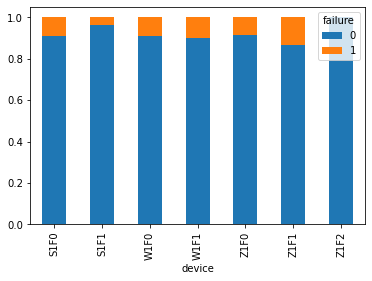

In [28]:
# Observing the failure vs success on scale of 1 from df2
dev.div(dev.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [29]:
# Changing data type for some of the numerical features
category_filters = ['attribute3','attribute4', 'attribute5', 'attribute7', 'attribute9'] 
for col in category_filters:
    df2[col]=df2[col].astype('object')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   device          1169 non-null   object         
 1   date            1169 non-null   datetime64[ns] 
 2   failure         1169 non-null   int64          
 3   attribute1      1169 non-null   int64          
 4   attribute2      1169 non-null   int64          
 5   attribute3      1169 non-null   object         
 6   attribute4      1169 non-null   object         
 7   attribute5      1169 non-null   object         
 8   attribute6      1169 non-null   int64          
 9   attribute7      1169 non-null   object         
 10  attribute8      1169 non-null   int64          
 11  attribute9      1169 non-null   object         
 12  activedays      1169 non-null   timedelta64[ns]
 13  month           1169 non-null   int64          
 14  week_day        1169 non-null   int64   

In [30]:
# Change active days datatype to numerical
def str_to_num(str):
    return str.split(' ')[0]

In [31]:
df2.activedays = df2.activedays.astype('str')
df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   attribute1      1169 non-null   int64         
 4   attribute2      1169 non-null   int64         
 5   attribute3      1169 non-null   object        
 6   attribute4      1169 non-null   object        
 7   attribute5      1169 non-null   object        
 8   attribute6      1169 non-null   int64         
 9   attribute7      1169 non-null   object        
 10  attribute8      1169 non-null   int64         
 11  attribute9      1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   int64         
 14  week_day        1169 non-null   int64         
 15  max_

In [32]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

Text(0.5, 1.0, 'Log Transformed Distribution')

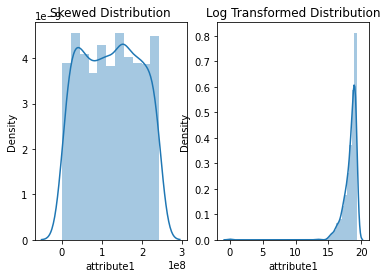

In [33]:
# Numerical features normalization
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['attribute1'],ax=axarr[0]) # plotting histogram with a line on it for attribute1
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['attribute1']),ax=axarr[1]) 
axarr[1].set_title('Log Transformed Distribution')

Text(0.5, 1.0, 'Log Transformed Distribution')

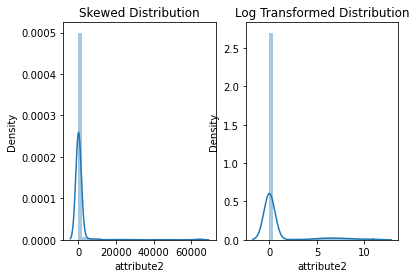

In [34]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['attribute2'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['attribute2']),ax=axarr[1]) 
axarr[1].set_title('Log Transformed Distribution')

Text(0.5, 1.0, 'Log Transformed Distribution')

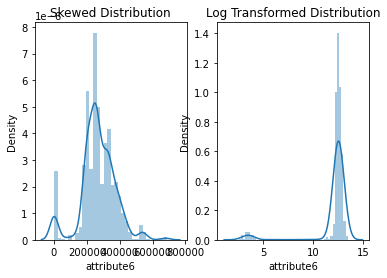

In [35]:
f, axarr = plt.subplots(1,2) 
sns.distplot(df2['attribute6'],ax=axarr[0]) 
axarr[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df2['attribute6']),ax=axarr[1]) 
axarr[1].set_title('Log Transformed Distribution')

In [36]:
# From the above plots we can see that data is getting more skewed after log transformation, so doing log transformation is not benefitting us.
#numerical features standardization
num_ftrs =['attribute1','attribute2','attribute6'] 
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device          1169 non-null   object        
 1   date            1169 non-null   datetime64[ns]
 2   failure         1169 non-null   int64         
 3   attribute1      1169 non-null   float64       
 4   attribute2      1169 non-null   float64       
 5   attribute3      1169 non-null   object        
 6   attribute4      1169 non-null   object        
 7   attribute5      1169 non-null   object        
 8   attribute6      1169 non-null   float64       
 9   attribute7      1169 non-null   object        
 10  attribute8      1169 non-null   int64         
 11  attribute9      1169 non-null   object        
 12  activedays      1169 non-null   int32         
 13  month           1169 non-null   object        
 14  week_day        1169 non-null   object        
 15  max_

In [37]:
# Drop attribute 8, as it is same as attribute 7, so removing duplicacy
df.drop('attribute8',axis=1,inplace=True)

In [38]:
df2.drop(['date','max_date'],axis=1,inplace=True)

In [39]:
# Now get dummies on categorical data
# A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value
df2 = pd.get_dummies(df2,drop_first=True)

In [40]:
# Selecting the value for X and y
X = df2.drop('failure',axis=1)
y = df2.failure

<AxesSubplot:xlabel='feature'>

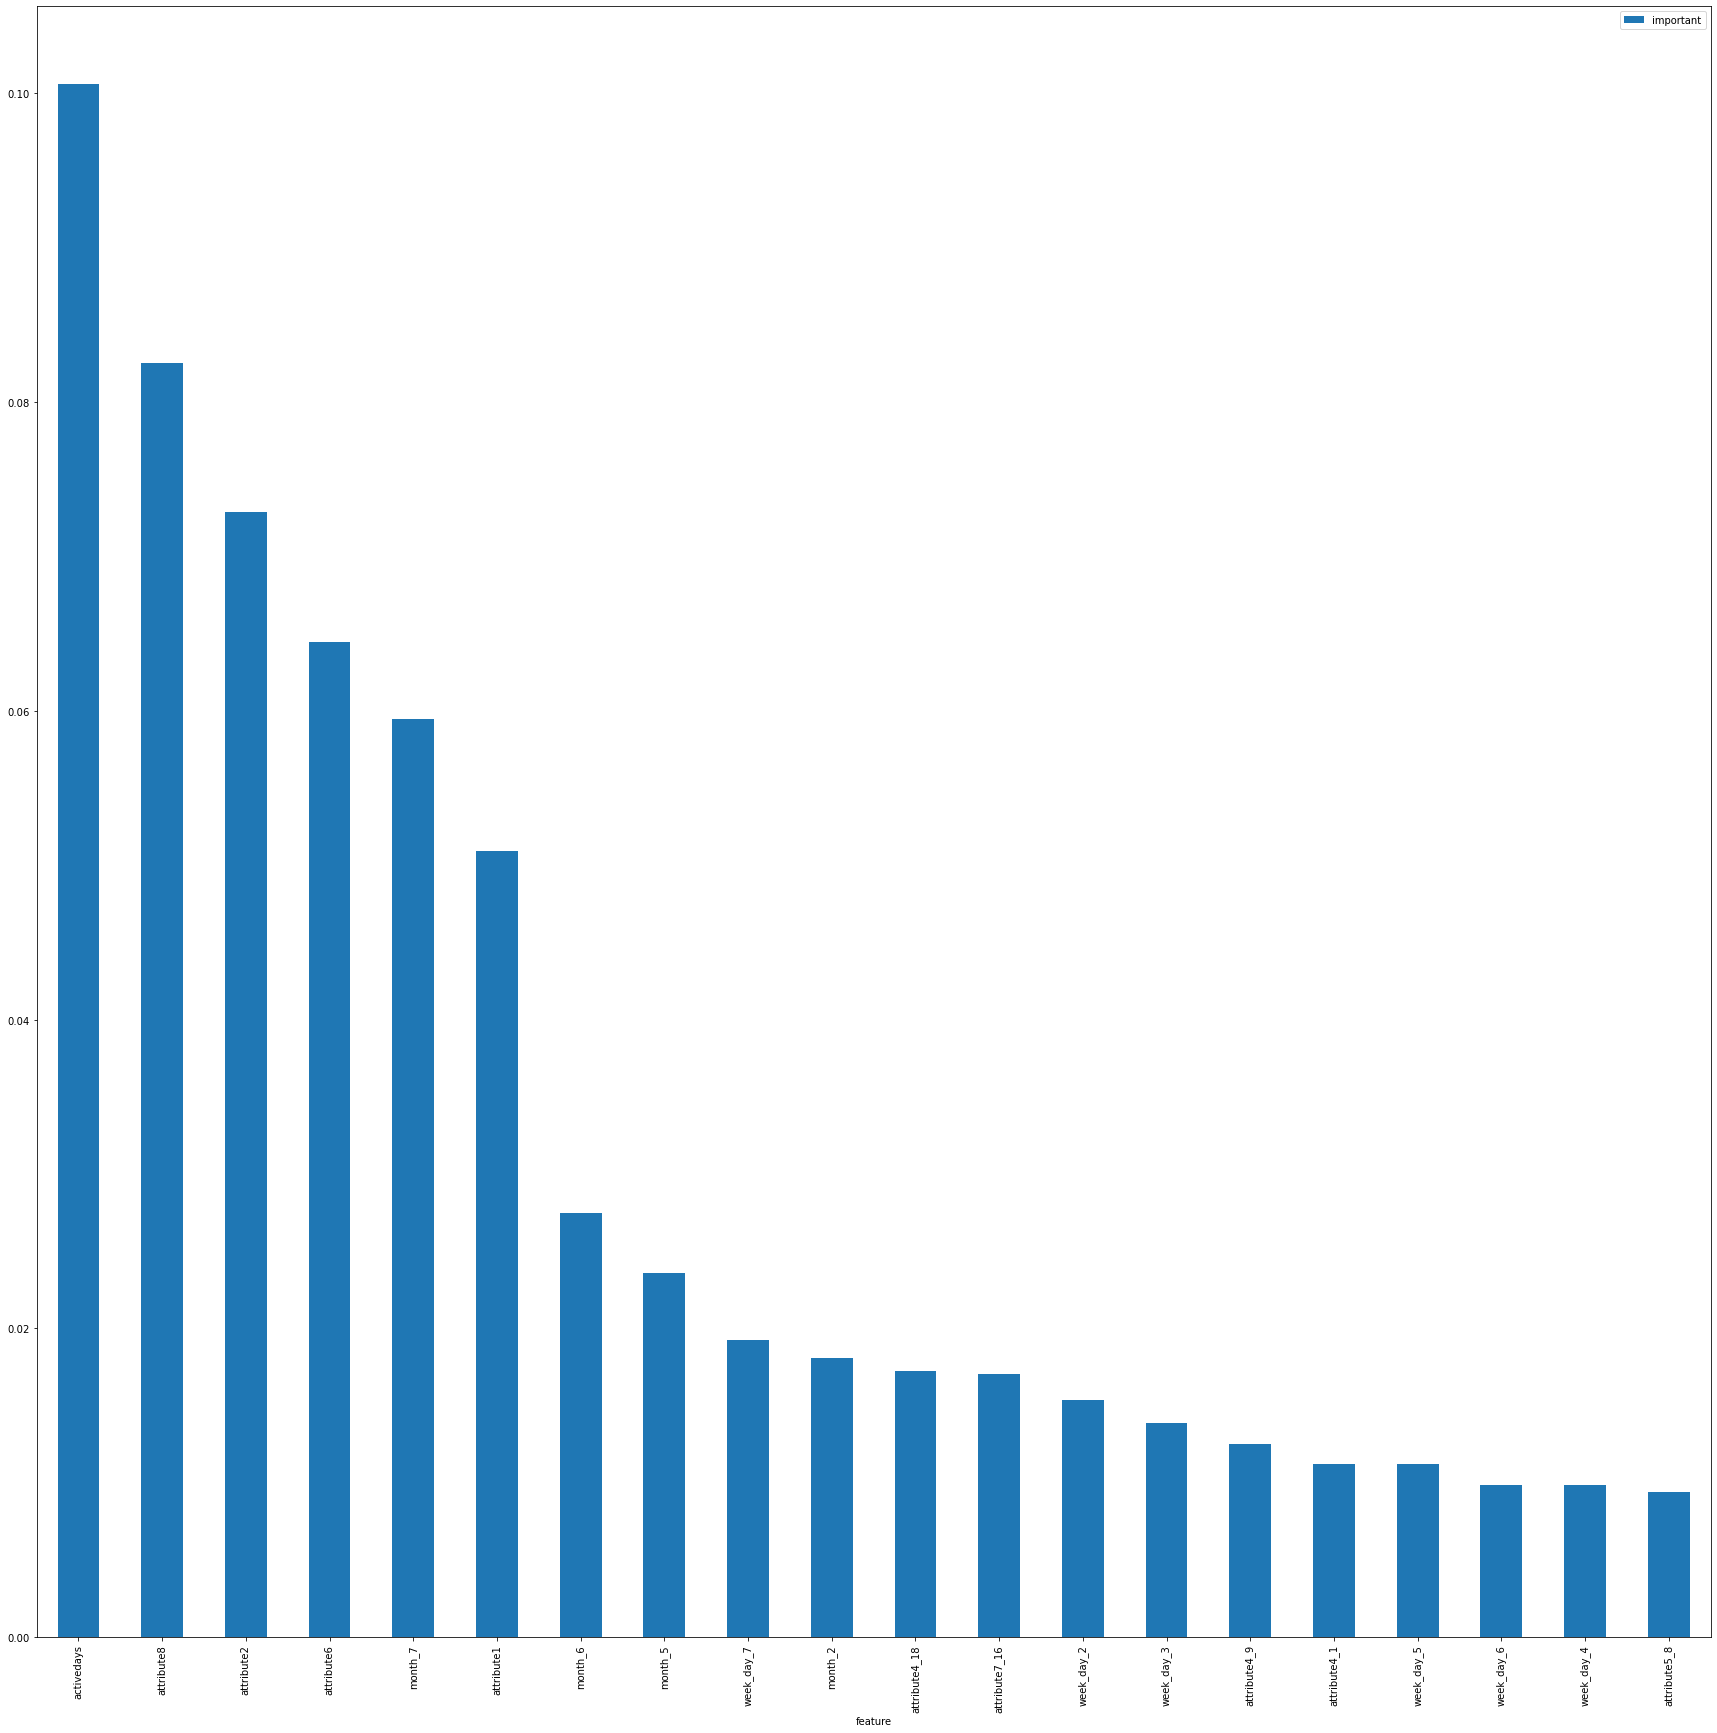

In [41]:
clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf= clf.fit(X,y)
features = pd.DataFrame() # created a dataframe called features
features['feature']= X.columns # created column features having 263 rows (263 rows × 1 columns)
features['important']=clf.feature_importances_ # created another columns in feature dataframe indicating the importance of each feature(263 rows × 2 columns)
features.sort_values(by=['important'], ascending=False,inplace=True) # sorted the rows by important column in ascending order
features.set_index('feature', inplace=True) # index set on feature columns
features.iloc[:20,:].plot(kind='bar', figsize=(30,30)) # plotting the bar graph for important features

In [42]:
model = SelectFromModel(clf,prefit=True)
x_reduced = model.transform(X)
print (x_reduced.shape)

(1169, 51)


In [43]:
type(x_reduced)

numpy.ndarray

In [44]:
x_reduced=pd.DataFrame(x_reduced)
x_reduced

0         1         2    3      4    5    6    7    8    9   ...  \
0     0.094795 -0.136309  1.333502  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   
1    -0.092146 -0.145660  4.008798  0.0  130.0  0.0  0.0  0.0  0.0  0.0  ...   
2    -1.630184 -0.145660  1.289341  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   
3     0.357937 -0.145660 -0.100105  0.0   47.0  0.0  0.0  0.0  0.0  0.0  ...   
4     0.898989 -0.145660  1.359772  0.0    5.0  0.0  0.0  0.0  0.0  0.0  ...   
...        ...       ...       ...  ...    ...  ...  ...  ...  ...  ...  ...   
1164 -0.358265 -0.145660 -0.061700  0.0  291.0  0.0  0.0  0.0  0.0  1.0  ...   
1165  0.794211 -0.145660 -0.044401  0.0  180.0  0.0  0.0  0.0  0.0  1.0  ...   
1166  1.519129 -0.145660  0.211274  0.0   83.0  0.0  0.0  0.0  0.0  0.0  ...   
1167 -0.702603 -0.145660 -0.736728  0.0   83.0  0.0  0.0  0.0  0.0  0.0  ...   
1168  0.118815 -0.145660 -1.013087  0.0   95.0  0.0  0.0  0.0  0.0  0.0  ...   

       41   42   43   44   45   46   47   48   49   50  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1164  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
1165  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1166  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1167  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1168  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[1169 rows x 51 columns]

In [45]:
# Test on RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x_reduced, y, train_size=0.8,random_state=42)
rus = RandomOverSampler(random_state=42)
# With training data created, I'll upsample the failed devices using the RandomOverSampler. This method object to over-sample the minority class(es) by picking samples at random with replacement.
X_res, y_res = rus.fit_resample(X_train, y_train)
X_res.shape
X_res = pd.DataFrame(X_res)
# After upsampling, build a random forest model to classify the failed devices
rf = RandomForestClassifier(n_estimators=5000, random_state=21)
a = rf.fit(X_res,y_res)
rf_test_pred = rf.predict(X_test)
rf_test_cm = confusion_matrix(y_test, rf_test_pred)
rf_test_cm
accuracy_score(y_test, rf_test_pred)
print(classification_report_imbalanced(y_test,rf_test_pred))
# pre indicates precision, which is a measure of result relevancy;
# rec indicates recall, which is the same as sensitivity. Recall is a measure of how many truly relevant results are returned;
# spe indicates specificity;
# f1 indicates the harmonic average of the precision and recall;
# geo(Matthews correlation coefficient) is the geometric mean of specificity and sensitivity;
# iba is the index of imbalanced accuracy

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.98      0.56      0.97      0.74      0.58       218
          1       0.69      0.56      0.98      0.62      0.74      0.53        16

avg / total       0.95      0.95      0.59      0.95      0.74      0.57       234



In [46]:
log=LogisticRegression()
k=KNeighborsClassifier()
gbc =GradientBoostingClassifier()
rgr = RandomForestRegressor(n_estimators=100)
xg_reg = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
algorithms=[k,log,gbc,rgr,xg_reg]
names=['KNeighborsClassifier','Logistic','GradientBoost','RandomForest','xgboost']
iba = make_index_balanced_accuracy(alpha=0.1, squared=True)(geo)

In [47]:
def cross_vali_fit_pred_1(X_res, y_res, algorithms = algorithms, names = names):
    X_res = X_res.to_numpy()
    Geo_score = []
    Iba_score = []
    Accuracy = []
    F1 = []
    Recall = []
    Prec = []
    for i in range(len(algorithms)):
        j=1
        kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
        geo_score = []
        iba_score = []
        accuracy = []
        f1 = []
        recall = []
        prec = []
        for train_index,test_index in kf.split(X_res,y_res):
            xtr,xvd=X_res[train_index],X_res[test_index]
            ytr,yvd=y_res[train_index],y_res[test_index]
            algorithms[i] = algorithms[i].fit(xtr,ytr)
            y_pred_test = algorithms[i].predict(xvd).round()
            accuracy.append(accuracy_score(yvd, y_pred_test))
            geo_score.append(geo(yvd, y_pred_test))
            iba_score.append(iba(yvd, y_pred_test))
            f1.append(f1_score(yvd, y_pred_test,average='macro'))
            recall.append(recall_score(yvd, y_pred_test,average='macro'))
            prec.append(precision_score(yvd, y_pred_test))
            j +=1
        mean_ac = np.mean(accuracy)
        mean_geo = np.mean(geo_score)
        mean_f1 = np.mean(f1)
        mean_iba = np.mean(iba_score)
        mean_recall = np.mean(recall)
        mean_prec = np.mean(prec)
        F1.append(mean_f1)
        Geo_score.append(mean_geo)
        Iba_score.append(mean_iba)
        Accuracy.append(mean_ac)
        Recall.append(mean_recall)
        Prec.append(mean_prec)
        #cm=confusion_matrix(y_test,y_test_pred)
        #print(cm)
    metrics = pd.DataFrame(columns = ['Accuracy','geo_score','iba_score','f1','recall','prec'],index=names)
    metrics['Accuracy']=Accuracy
    metrics['geo_score']=Geo_score
    metrics['iba_score']=Iba_score
    metrics['f1']=F1
    metrics['recall']=Recall
    metrics['prec'] =Prec
    return metrics.sort_values('geo_score',ascending=False)

In [48]:
cross_vali_fit_pred_1(X_res, y_res, algorithms = algorithms, names = names)

[07:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


Accuracy  geo_score  iba_score        f1    recall  \
KNeighborsClassifier  0.987647   0.987564   0.975294  0.987645  0.987647   
RandomForest          0.984118   0.983985   0.968235  0.984113  0.984118   
GradientBoost         0.982941   0.982888   0.966083  0.982939  0.982941   
xgboost               0.925294   0.925136   0.856076  0.925273  0.925294   
Logistic              0.877647   0.876588   0.768478  0.877422  0.877647   

                          prec  
KNeighborsClassifier  0.975933  
RandomForest          0.969246  
GradientBoost         0.974611  
xgboost               0.914262  
Logistic              0.891120

In [49]:
geo(y_test, xg_reg.predict(X_test).round())

0.8869595524635957

In [50]:
geo(y_test, k.predict(X_test).round())

0.882585079195399

In [51]:
def cross_vali_fit_pred_2(X_train, y_train, algorithms = algorithms, names = names):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()

    Geo_score = []
    Iba_score = []
    Accuracy = []
    F1 = []
    Recall = []
    Prec = []
    for i in range(len(algorithms)):
        j=1
        kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
        geo_score = []
        iba_score = []
        accuracy = []
        f1 = []
        recall = []
        prec = []
        for train_index,test_index in kf.split(X_train, y_train):
            xtr,xvd=X_train[train_index],X_train[test_index]
            ytr,yvd=y_train[train_index],y_train[test_index]
            xtr_res,ytr_res=rus.fit_resample(xtr, ytr)
            algorithms[i] = algorithms[i].fit(xtr_res,ytr_res)
            y_pred_test = algorithms[i].predict(xvd).round()
            accuracy.append(accuracy_score(yvd, y_pred_test))
            geo_score.append(geo(yvd, y_pred_test))
            iba_score.append(iba(yvd, y_pred_test))
            f1.append(f1_score(yvd, y_pred_test,average='macro'))
            recall.append(recall_score(yvd, y_pred_test,average='macro'))
            prec.append(precision_score(yvd, y_pred_test))
            j +=1
        mean_ac = np.mean(accuracy)
        mean_geo = np.mean(geo_score)
        mean_f1 = np.mean(f1)
        mean_iba = np.mean(iba_score)
        mean_recall = np.mean(recall)
        mean_prec = np.mean(prec)
        F1.append(mean_f1)
        Geo_score.append(mean_geo)
        Iba_score.append(mean_iba)
        Accuracy.append(mean_ac)
        Recall.append(mean_recall)
        Prec.append(mean_prec)
    metrics = pd.DataFrame(columns = ['Accuracy','geo_score','iba_score','f1','recall','prec'],index=names)
    metrics['Accuracy']=Accuracy
    metrics['geo_score']=Geo_score
    metrics['iba_score']=Iba_score
    metrics['f1']=F1
    metrics['recall']=Recall
    metrics['prec']=Prec
    return metrics.sort_values('geo_score',ascending=False)

In [52]:
cross_vali_fit_pred_2(X_train, y_train, algorithms = algorithms, names = names)

[07:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


Accuracy  geo_score  iba_score        f1    recall  \
GradientBoost         0.965775   0.903458   0.817785  0.898355  0.907059   
KNeighborsClassifier  0.961497   0.889931   0.792457  0.885820  0.894118   
xgboost               0.916578   0.878275   0.771626  0.800769  0.880000   
RandomForest          0.949733   0.840791   0.709066  0.848237  0.850588   
Logistic              0.877005   0.791682   0.631972  0.723575  0.800000   

                          prec  
GradientBoost         0.798400  
KNeighborsClassifier  0.777924  
xgboost               0.536774  
RandomForest          0.720640  
Logistic              0.414389

In [53]:
# Model Evaluation
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
probs1 = k.predict_proba(X_test)
probs2 = xg_reg.predict_proba(X_test)
probs3 = gbc.predict_proba(X_test)
probs1 = probs1[:,1]
probs2 = probs2[:,1]
probs3 = probs3[:,1]

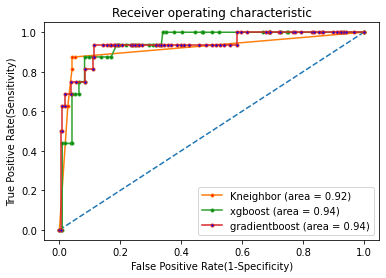

In [54]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs3)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.', markerfacecolor='r',label='Kneighbor (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, marker='.', markerfacecolor='g',label='xgboost (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, marker='.', markerfacecolor='b',label='gradientboost (area = %0.2f)' % roc_auc3)
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
geo(y_test, k.predict(X_test).round())

0.882585079195399

In [56]:
geo(y_test, gbc.predict(X_test).round())

0.8195923690324031

In [57]:
geo(y_test, xg_reg.predict(X_test).round())

0.8633729460880143

In [58]:
# Model Tuning
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
Geo1=[]
Geo2=[]
estimators = [i for i in range(5,150,10)]
Learning_rate = [i for i in np.arange(0.05,0.4,0.03)]
geo_score = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for i in estimators:
    for train_index,test_index in kf.split(X_train, y_train):
        xtr,xvd=X_train[train_index],X_train[test_index]
        ytr,yvd=y_train[train_index],y_train[test_index]
        xtr_res,ytr_res=rus.fit_resample(xtr, ytr)
        gbc =GradientBoostingClassifier(n_estimators=i).fit(xtr_res,ytr_res)
        y_pred_test = gbc.predict(xvd).round()
        #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
        geo_score.append(precision_score(yvd, y_pred_test))
    Geo1.append(np.mean(geo_score))
print(Geo1)

[0.5514936600042983, 0.6050588771000402, 0.646388457749233, 0.6716760947161269, 0.6891449313664311, 0.6999000855232651, 0.7110744019844958, 0.718834838578539, 0.7222444710809768, 0.7296261471238938, 0.7350809049282795, 0.7405329691804723, 0.7478234790529913, 0.7546572828367879, 0.7594252286868843]


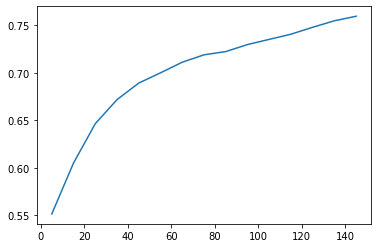

In [59]:
plt.plot(estimators,Geo1)

In [61]:
Geo2=[]
Learning_rate = [i for i in np.arange(0.01,0.2,0.03)]
geo_score = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for i in Learning_rate:
    for train_index,test_index in kf.split(X_train, y_train):
        xtr,xvd=X_train[train_index],X_train[test_index]
        ytr,yvd=y_train[train_index],y_train[test_index]
        xtr_res,ytr_res=rus.fit_resample(xtr, ytr)
        gbc =GradientBoostingClassifier(n_estimators=100,learning_rate=i).fit(xtr_res,ytr_res)
        y_pred_test = gbc.predict(xvd).round()
        #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
        geo_score.append(geo(yvd, y_pred_test))
    Geo2.append(np.mean(geo_score))

print(Geo2)

[0.8029929180346617, 0.860067813723664, 0.8737660313702736, 0.8794757590266675, 0.8833292224967377, 0.8861607102887592, 0.888276936118156]


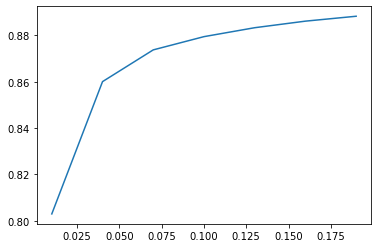

In [62]:
plt.plot(Learning_rate,Geo2)

In [63]:
Geo=[]
prec=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for n_index,test_index in kf.split(X_train, y_train):
    xtr,xvd=X_train[train_index],X_train[test_index]
    ytr,yvd=y_train[train_index],y_train[test_index]
    xtr_res,ytr_res=rus.fit_resample(xtr, ytr)
    gbc =gbc.fit(xtr_res,ytr_res)
    y_pred_test = gbc.predict(xvd).round()
    
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
    Geo.append(geo(yvd, y_pred_test))
    prec.append(precision_score(yvd, y_pred_test))

print(np.mean(Geo))

0.9781211611696303


In [64]:
np.mean(prec)

0.9313725490196078

In [65]:
prob=gbc.predict_proba(X_test)

In [66]:
# values of y_test
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
# Output
y_pred_prob = pd.DataFrame(y_test)
y_pred_prob['0']=prob[:,0]
y_pred_prob['1']=prob[:,1]
y_pred_prob.head(30)

0         0         1
0   0  0.996536  0.003464
1   0  0.996657  0.003343
2   0  0.839708  0.160292
3   0  0.652335  0.347665
4   0  0.995520  0.004480
5   0  0.997935  0.002065
6   0  0.971121  0.028879
7   0  0.926377  0.073623
8   0  0.985797  0.014203
9   0  0.955055  0.044945
10  0  0.996970  0.003030
11  0  0.874389  0.125611
12  0  0.989664  0.010336
13  0  0.995476  0.004524
14  0  0.985644  0.014356
15  0  0.000703  0.999297
16  0  0.881722  0.118278
17  0  0.961502  0.038498
18  0  0.986950  0.013050
19  0  0.166407  0.833593
20  0  0.995264  0.004736
21  0  0.996700  0.003300
22  0  0.987870  0.012130
23  0  0.995774  0.004226
24  0  0.996657  0.003343
25  0  0.981335  0.018665
26  0  0.992053  0.007947
27  0  0.615663  0.384337
28  1  0.851588  0.148412
29  0  0.995745  0.004255


*Initial Observation:* <br>
1. There was no missing data in the dataset
2. Duplicates rows less than 1% for the dataset
3. attribute2, attribute3, attribute4, attribute7, attribute9 had highly skewed zeros and very few distinct values
4. attribute7 and attribute8 were same
6. The starting name (specifically strating four character) of devices were changing very infrequently
7. Dataset was very unbalanced

*Gradual Observation and Work:* <br>
1. No. of devices failed was inversely propotional to activedays
2. 5 devices started working again after the failure
3. Tried to normalize the attributes using log transformation, but it increased the skewness, so dropped the idea of log transformation
4. Did feature selection with the help of RandomForestClassifier
5. Reduced the features from 263 to 51 important ones
6. Performed oversampling using RandomOverSampler
7. Used StratifiedKFold validation on 'KNeighborsClassifier','Logistic','GradientBoost','RandomForest','xgboost' alogrithms 

*Conclusion:* <br>
1. The precision and recall value acheieved for the alogithms used were good
2. Model predicted for different algorithms like 'KNeighborsClassifier','Logistic','GradientBoost','RandomForest','xgboost'
1. Output: The probability of y_pred for 0 and 1 